In [1]:
import random
import numpy as np
import matplotlib.pyplot as mp

s = np.random.randint(low=-100, high=100, size=(100), dtype=int)

In [3]:
s.shape

(100,)

In [4]:
xmax = np.max(s)
xmin = np.min(s)

In [5]:
xmax

94

In [6]:
xmin

-99

In [8]:
m=100

In [9]:
bins  = (xmax -xmin)/m

In [23]:
bins
h = np.zeros(m)

<BarContainer object of 100 artists>

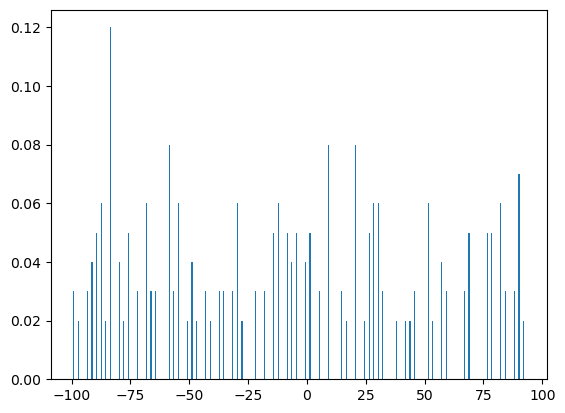

In [27]:
n = np.size(s)

for i in range(n):
    b =  int(np.floor((s[i] - xmin)/bins))
    if b == m:
        b = b-1
    h[b] = h[b] + (1/n) 

x = np.array([xmin + bins*i for i in range(m)])
mp.bar(x,h,width = 0.5)

In [65]:
list = [4,5,9,3,6,7,8,10]
list[::1]

import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = A[1:2,1:2]

print(B)

[[5]]


In [48]:
import numpy as np

# Create a sample dataset with 3 features and 10 data points
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])

new  = X[:,[0,2]]
print(new)
#np.mean(X, axis=0).shape
Y = np.array([1,2,3,4,5,6,7])
print(Y.shape)
Y = Y[[0,1,2]]
print(Y)

[[ 1  3]
 [ 4  6]
 [ 7  9]
 [10 12]
 [13 15]
 [16 18]]
(7,)
[1 2 3]


In [38]:
# Center the data by subtracting the mean of each feature
X_centered = X - np.mean(X, axis=0)
X_centered.shape

(6, 3)

In [62]:
# Calculate the covariance matrix of the centered data
#covariance_matrix = np.cov(X_centered, rowvar=False)
covariance_matrix = (1/(X_centered.shape[0]-1))*np.dot(np.transpose(X_centered),X_centered)
print(covariance_matrix)

[[31.5 31.5 31.5]
 [31.5 31.5 31.5]
 [31.5 31.5 31.5]]


In [54]:
# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues.shape
print(eigenvalues[[0,1,2]])

[ 9.45000000e+01  3.94430453e-31 -1.02692481e-15]


In [55]:
# Sort the eigenvalues in descending order and get the corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
print(sorted_indices)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:,sorted_indices]

[0 1 2]


In [75]:

# Choose the top k eigenvectors to keep (where k is the desired number of dimensions)
k = 2
top_k_eigenvectors = sorted_eigenvectors[:,:k]

In [74]:
# Project the centered data onto the top k eigenvectors to get the reduced dataset
X_reduced = np.dot(X_centered, top_k_eigenvectors)

# Print the reduced dataset
print(X_reduced)

[[-1.29903811e+01 -3.33066907e-16]
 [-7.79422863e+00 -1.11022302e-16]
 [-2.59807621e+00 -1.11022302e-16]
 [ 2.59807621e+00  1.11022302e-16]
 [ 7.79422863e+00  1.11022302e-16]
 [ 1.29903811e+01  3.33066907e-16]]


In [172]:
import numpy as np
import random

def kmeans(X, k, max_iters=100):
    n, m = X.shape

    # Step 1: Initialize centroids randomly
    #centroids = np.array([X[random.randint(0, n - 1)] for _ in range(k)])
    centroids = X[np.random.choice(len(X),k,replace=False)]
    print(centroids)
    # Step 2: Assign each point to the nearest centroid
    for _ in range(max_iters):
        distances = np.linalg.norm(X - centroids[:, np.newaxis], axis=2)
        assignments = np.argmin(distances, axis=0)

        # Step 3: Update centroids
        for i in range(k):
            points = X[assignments == i]
            centroids[i] = np.mean(points, axis=0)

    return assignments, centroids

def perform_kmeans(X,k,iter):
    n, m = X.shape
     
    centroids = X[np.random.choice(len(X),k,replace=False)]
    
    while(iter):
        distances = []
        for c in centroids:
            d = []
            for x in X:
                d.append(np.linalg.norm(x - c))
            distances.append(d)
        distances = np.array(distances)
 
        
        assignments = []
        cluster = []
        for i in range(X.shape[0]):
            cluster = np.argmin(distances[:,i])
            assignments.append(cluster)
        
        for j in range(k):
            points = X[assignments == j]
            if len(points) > 0:
                centroids[j] = np.mean(points, axis=0)
        iter = iter - 1
    return assignments, centroids
        

In [173]:
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])

In [177]:
assignments, centroids = perform_kmeans(X, 2, 100)

In [178]:
assignments

[1, 1, 1, 1, 1, 0]

In [179]:
centroids

array([[16, 17, 18],
       [13, 14, 15]])